In [9]:
import csv
import pandas as pd
data = pd.read_csv('data/dbpedia/train_subset.csv')
sentences = data['Text']
labels = data['Class']
sentences = sentences[0:5100]
labels = labels[0:5100]
label_names = pd.read_csv('data/dbpedia/classes.txt', header=None)[0]

Data to collect:
- target prediction probability of member
- target prediction probability of non-member
- y = list where each element is 1 if member and 0 if non-member
- y_prob = list where each element is the target prediction probability

In [10]:
member_prob = []
nonmember_prob = []
y_prob = []
y = []
for i in range(0,5100):
    if (i % 51 == 0):
          y.append(1) # member
    else:
         y.append(0) # not a member

In [15]:
import time
import os
import openai

openai.api_key = os.getenv("OPENAI_API_KEY")

for i in range(0,58):
    prob=0
    prompt_answer=""
    if (label_names[labels[51*i]-1] == "Company"):
            prompt_answer=" Company"
    elif (label_names[labels[51*i]-1] == "EducationalInstitution"):
        prompt_answer=" School"
    elif (label_names[labels[51*i]-1] == "Artist"):
        prompt_answer=" Artist"
    elif (label_names[labels[51*i]-1] == "Athlete"):
        prompt_answer=" Athlete"
    elif (label_names[labels[51*i]-1] == "OfficeHolder"):
        prompt_answer=" Politician"
    elif (label_names[labels[51*i]-1] == "MeanOfTransportation"):
        prompt_answer=" Transportation"
    elif (label_names[labels[51*i]-1] == "Building"):
        prompt_answer=" Building"
    elif (label_names[labels[51*i]-1] == "NaturalPlace"):
        prompt_answer=" Nature"
    elif (label_names[labels[51*i]-1] == "Village"):
        prompt_answer=" Village"
    elif (label_names[labels[51*i]-1] == "Animal"):
        prompt_answer=" Animal"
    elif (label_names[labels[51*i]-1] == "Plant"):
        prompt_answer=" Plant"
    elif (label_names[labels[51*i]-1] == "Album"):
        prompt_answer=" Album"
    elif (label_names[labels[51*i]-1] == "Film"):
        prompt_answer=" Film"
    elif (label_names[labels[51*i]-1] == "WrittenWork"):
        prompt_answer=" Book"

    for j in range(0,51):
        prompt=f"Classify the documents based on whether they are about a Company, School, Artist, Athlete, Politician, Transportation, Building, Nature, Village, Animal, Plant, Album, Film, or Book.\n\nArticle:{sentences[51*i]} Answer:{prompt_answer}\nArticle: {sentences[(51*i)+j]} Answer:"
        completion=openai.Completion.create(
            model="babbage",
            prompt=prompt,
            max_tokens=1,
            temperature=0,
            logprobs=5
        )

        if ((label_names[labels[(51*i)+j]-1] == "Company") and (" Company" in completion.choices[0].logprobs.top_logprobs[0])):
            prob=10**completion.choices[0].logprobs.top_logprobs[0][" Company"]
        elif ((label_names[labels[(51*i)+j]-1] == "EducationalInstitution") and (" School" in completion.choices[0].logprobs.top_logprobs[0])):
            prob=10**completion.choices[0].logprobs.top_logprobs[0][" School"]
        elif ((label_names[labels[(51*i)+j]-1] == "Artist") and (" Artist" in completion.choices[0].logprobs.top_logprobs[0])):
            prob=10**completion.choices[0].logprobs.top_logprobs[0][" Artist"]
        elif ((label_names[labels[(51*i)+j]-1] == "Athlete") and (" Ath" in completion.choices[0].logprobs.top_logprobs[0])):
            prob=10**completion.choices[0].logprobs.top_logprobs[0][" Ath"]
        elif ((label_names[labels[(51*i)+j]-1] == "OfficeHolder") and (" Polit" in completion.choices[0].logprobs.top_logprobs[0])):
            prob=10**completion.choices[0].logprobs.top_logprobs[0][" Polit"]
        elif ((label_names[labels[(51*i)+j]-1] == "MeanOfTransportation") and (" Transportation" in completion.choices[0].logprobs.top_logprobs[0])):
            prob=10**completion.choices[0].logprobs.top_logprobs[0][" Transportation"]
        elif ((label_names[labels[(51*i)+j]-1] == "Building") and (" Building" in completion.choices[0].logprobs.top_logprobs[0])):
            prob=10**completion.choices[0].logprobs.top_logprobs[0][" Building"]
        elif ((label_names[labels[(51*i)+j]-1] == "NaturalPlace") and (" Nature" in completion.choices[0].logprobs.top_logprobs[0])):
            prob=10**completion.choices[0].logprobs.top_logprobs[0][" Nature"]
        elif ((label_names[labels[(51*i)+j]-1] == "Village") and (" Village" in completion.choices[0].logprobs.top_logprobs[0])):
            prob=10**completion.choices[0].logprobs.top_logprobs[0][" Village"]
        elif ((label_names[labels[(51*i)+j]-1] == "Animal") and (" Animal" in completion.choices[0].logprobs.top_logprobs[0])):
            prob=10**completion.choices[0].logprobs.top_logprobs[0][" Animal"]
        elif ((label_names[labels[(51*i)+j]-1] == "Plant") and (" Plant" in completion.choices[0].logprobs.top_logprobs[0])):
            prob=10**completion.choices[0].logprobs.top_logprobs[0][" Plant"]
        elif ((label_names[labels[(51*i)+j]-1] == "Album") and (" Album" in completion.choices[0].logprobs.top_logprobs[0])):
            prob=10**completion.choices[0].logprobs.top_logprobs[0][" Album"]
        elif ((label_names[labels[(51*i)+j]-1] == "Film") and (" Film" in completion.choices[0].logprobs.top_logprobs[0])):
            prob=10**completion.choices[0].logprobs.top_logprobs[0][" Film"]
        elif ((label_names[labels[(51*i)+j]-1] == "WrittenWork") and (" Book" in completion.choices[0].logprobs.top_logprobs[0])):
            prob=10**completion.choices[0].logprobs.top_logprobs[0][" Book"]
        else:
            prob=0

        if ((((51*i)+j) % 51) == 0): # is a member
            member_prob.append(prob)
        else: # not a member
            nonmember_prob.append(prob)

        y_prob.append(prob)

        print(f"Done processing request # {(51*i)+j}...")


print("Done!")

Done processing request # 0...
Done processing request # 1...
Done processing request # 2...
Done processing request # 3...
Done processing request # 4...
Done processing request # 5...
Done processing request # 6...
Done processing request # 7...
Done processing request # 8...
Done processing request # 9...
Done processing request # 10...
Done processing request # 11...
Done processing request # 12...
Done processing request # 13...
Done processing request # 14...
Done processing request # 15...
Done processing request # 16...
Done processing request # 17...
Done processing request # 18...
Done processing request # 19...
Done processing request # 20...
Done processing request # 21...
Done processing request # 22...
Done processing request # 23...
Done processing request # 24...
Done processing request # 25...
Done processing request # 26...
Done processing request # 27...
Done processing request # 28...
Done processing request # 29...
Done processing request # 30...
Done processing re

In [17]:
import time
import os
import openai

openai.api_key = os.getenv("OPENAI_API_KEY")

for i in range(58,100):
    prob=0
    prompt_answer=""
    if (label_names[labels[51*i]-1] == "Company"):
            prompt_answer=" Company"
    elif (label_names[labels[51*i]-1] == "EducationalInstitution"):
        prompt_answer=" School"
    elif (label_names[labels[51*i]-1] == "Artist"):
        prompt_answer=" Artist"
    elif (label_names[labels[51*i]-1] == "Athlete"):
        prompt_answer=" Athlete"
    elif (label_names[labels[51*i]-1] == "OfficeHolder"):
        prompt_answer=" Politician"
    elif (label_names[labels[51*i]-1] == "MeanOfTransportation"):
        prompt_answer=" Transportation"
    elif (label_names[labels[51*i]-1] == "Building"):
        prompt_answer=" Building"
    elif (label_names[labels[51*i]-1] == "NaturalPlace"):
        prompt_answer=" Nature"
    elif (label_names[labels[51*i]-1] == "Village"):
        prompt_answer=" Village"
    elif (label_names[labels[51*i]-1] == "Animal"):
        prompt_answer=" Animal"
    elif (label_names[labels[51*i]-1] == "Plant"):
        prompt_answer=" Plant"
    elif (label_names[labels[51*i]-1] == "Album"):
        prompt_answer=" Album"
    elif (label_names[labels[51*i]-1] == "Film"):
        prompt_answer=" Film"
    elif (label_names[labels[51*i]-1] == "WrittenWork"):
        prompt_answer=" Book"

    for j in range(0,51):
        prompt=f"Classify the documents based on whether they are about a Company, School, Artist, Athlete, Politician, Transportation, Building, Nature, Village, Animal, Plant, Album, Film, or Book.\n\nArticle:{sentences[51*i]} Answer:{prompt_answer}\nArticle: {sentences[(51*i)+j]} Answer:"
        completion=openai.Completion.create(
            model="babbage",
            prompt=prompt,
            max_tokens=1,
            temperature=0,
            logprobs=5
        )

        if ((label_names[labels[(51*i)+j]-1] == "Company") and (" Company" in completion.choices[0].logprobs.top_logprobs[0])):
            prob=10**completion.choices[0].logprobs.top_logprobs[0][" Company"]
        elif ((label_names[labels[(51*i)+j]-1] == "EducationalInstitution") and (" School" in completion.choices[0].logprobs.top_logprobs[0])):
            prob=10**completion.choices[0].logprobs.top_logprobs[0][" School"]
        elif ((label_names[labels[(51*i)+j]-1] == "Artist") and (" Artist" in completion.choices[0].logprobs.top_logprobs[0])):
            prob=10**completion.choices[0].logprobs.top_logprobs[0][" Artist"]
        elif ((label_names[labels[(51*i)+j]-1] == "Athlete") and (" Ath" in completion.choices[0].logprobs.top_logprobs[0])):
            prob=10**completion.choices[0].logprobs.top_logprobs[0][" Ath"]
        elif ((label_names[labels[(51*i)+j]-1] == "OfficeHolder") and (" Polit" in completion.choices[0].logprobs.top_logprobs[0])):
            prob=10**completion.choices[0].logprobs.top_logprobs[0][" Polit"]
        elif ((label_names[labels[(51*i)+j]-1] == "MeanOfTransportation") and (" Transportation" in completion.choices[0].logprobs.top_logprobs[0])):
            prob=10**completion.choices[0].logprobs.top_logprobs[0][" Transportation"]
        elif ((label_names[labels[(51*i)+j]-1] == "Building") and (" Building" in completion.choices[0].logprobs.top_logprobs[0])):
            prob=10**completion.choices[0].logprobs.top_logprobs[0][" Building"]
        elif ((label_names[labels[(51*i)+j]-1] == "NaturalPlace") and (" Nature" in completion.choices[0].logprobs.top_logprobs[0])):
            prob=10**completion.choices[0].logprobs.top_logprobs[0][" Nature"]
        elif ((label_names[labels[(51*i)+j]-1] == "Village") and (" Village" in completion.choices[0].logprobs.top_logprobs[0])):
            prob=10**completion.choices[0].logprobs.top_logprobs[0][" Village"]
        elif ((label_names[labels[(51*i)+j]-1] == "Animal") and (" Animal" in completion.choices[0].logprobs.top_logprobs[0])):
            prob=10**completion.choices[0].logprobs.top_logprobs[0][" Animal"]
        elif ((label_names[labels[(51*i)+j]-1] == "Plant") and (" Plant" in completion.choices[0].logprobs.top_logprobs[0])):
            prob=10**completion.choices[0].logprobs.top_logprobs[0][" Plant"]
        elif ((label_names[labels[(51*i)+j]-1] == "Album") and (" Album" in completion.choices[0].logprobs.top_logprobs[0])):
            prob=10**completion.choices[0].logprobs.top_logprobs[0][" Album"]
        elif ((label_names[labels[(51*i)+j]-1] == "Film") and (" Film" in completion.choices[0].logprobs.top_logprobs[0])):
            prob=10**completion.choices[0].logprobs.top_logprobs[0][" Film"]
        elif ((label_names[labels[(51*i)+j]-1] == "WrittenWork") and (" Book" in completion.choices[0].logprobs.top_logprobs[0])):
            prob=10**completion.choices[0].logprobs.top_logprobs[0][" Book"]
        else:
            prob=0

        if ((((51*i)+j) % 51) == 0): # is a member
            member_prob.append(prob)
        else: # not a member
            nonmember_prob.append(prob)

        y_prob.append(prob)

        print(f"Done processing request # {(51*i)+j}...")


print("Done!")

Done processing request # 2958...
Done processing request # 2959...
Done processing request # 2960...
Done processing request # 2961...
Done processing request # 2962...
Done processing request # 2963...
Done processing request # 2964...
Done processing request # 2965...
Done processing request # 2966...
Done processing request # 2967...
Done processing request # 2968...
Done processing request # 2969...
Done processing request # 2970...
Done processing request # 2971...
Done processing request # 2972...
Done processing request # 2973...
Done processing request # 2974...
Done processing request # 2975...
Done processing request # 2976...
Done processing request # 2977...
Done processing request # 2978...
Done processing request # 2979...
Done processing request # 2980...
Done processing request # 2981...
Done processing request # 2982...
Done processing request # 2983...
Done processing request # 2984...
Done processing request # 2985...
Done processing request # 2986...
Done processin

In [18]:
import json

# Save the lists to JSON files
with open('dbpedia_member_prob.json', 'w') as file:
    json.dump(member_prob, file)

with open('dbpedia_nonmember_prob.json', 'w') as file:
    json.dump(nonmember_prob, file)

with open('dbpedia_y_prob.json', 'w') as file:
    json.dump(y_prob, file)

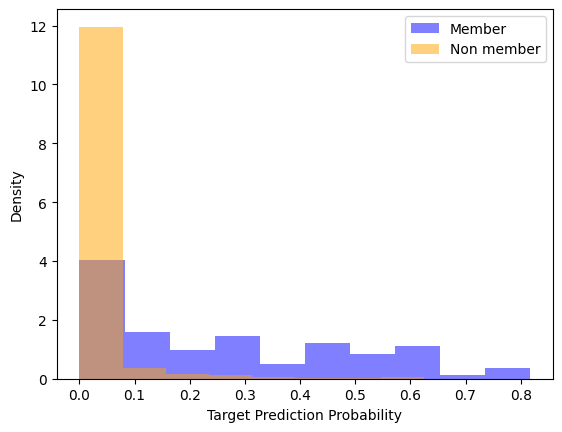

In [27]:
import matplotlib.pyplot as plt
plt.hist(member_prob, bins=10, density=True, alpha=0.5, color='blue', label='Member')
plt.hist(nonmember_prob, bins=10, density=True, alpha=0.5, color='orange', label='Non member')

# Add labels and legend
plt.xlabel('Target Prediction Probability')
plt.ylabel('Density')
plt.legend()

# Show the plot
plt.show()

In [2]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve

def plot_roc_curve(true_y, y_prob):
    """
    plots the roc curve based of the probabilities
    """

    fpr, tpr, thresholds = roc_curve(true_y, y_prob)
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

dbpedia AUC-ROC score: 0.9138440000000001


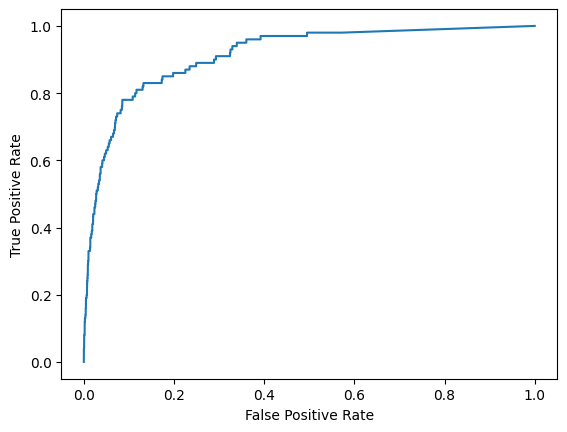

In [10]:
plot_roc_curve(y, y_prob)
print(f'dbpedia AUC-ROC score: {roc_auc_score(y, y_prob)}')